Answer the following questions at the corresponding question numbers __in the "Assignment 1 test" SunLearn quiz__, doing calculations in this notebook where necessary/desired.  __Give answers rounded to 4 decimal places - answers must be exactly correct to receive marks.__

__Remember to divide by N, not N-1, in the computation of all variances in this test__.

---------

*Beantwoord die volgende vrae by die ooreenstemmende vraagnommers __in die "Taak 1 toets" SunLearn quiz__, en doen u berekeninge in hierdie notaboek waar nodig/gewens. __Gee antwoorde gerond tot 4 desimale plekke - antwoorde moet presies korrek wees om punte te ontvang.__*

__Onthou om te deel deur N, nie N-1 nie, in die berekening van alle variansies in hierdie toets__.

---------

In [113]:
import numpy as np

**Question 1 (3 marks).** Consider the 4x2 matrix $M$ below. // __*Vraag 1 (3 punte).*__ *Beskou die 4x2 matriks $M$ hieronder.*

In [114]:
M = np.array([[6, 12, 24], [2, 6, 10], [-1, -2, -4], [0, 0, 0]])

(a) Give the third largest singular value of $M$. [1] // *Gee die derde grootste singuliere waarde van $M$.* [1]



In [118]:
M_trans = M.T
u, s, vh = np.linalg.svd(M_trans, full_matrices=False)
print(s)
print(s[2])

[3.02659974e+01 9.84581094e-01 1.88715069e-16]
1.887150688926998e-16


(b) Viewing $M$ as a sample of *four 3-dimensional data points*, give (i) the sample covariance between the first and the third feature [1] and (ii) the eigenvalue corresponding to the principal eigenvector of the sample covariance matrix [1]. // *As mens $M$ as 'n steekproef van* vier 3-dimensionele datapunte *beskou, gee (i) die steekproefkovariansie tussen die eerste en die derde kenmerk [1], en (ii) die eiewaarde wat ooreenstem met die hoofeievektor van die steekproefkovariansiematriks. [1].*

In [121]:
d, N = M_trans.shape
mean = np.mean(M_trans, axis=1)[:,np.newaxis]
D = M_trans - mean
cov = (D.dot(D.T))/N
print(cov)

eigen_values, eigen_vectors = np.linalg.eigh(cov)

idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]

print(eigen_values[0])

[[  7.1875  14.5     28.875 ]
 [ 14.5     30.      59.    ]
 [ 28.875   59.     116.75  ]]
153.7277134932788


**Question 2 (4 marks).** The code below should load the data matrix from the Breast Cancer Wisconsin benchmark data set into the variable `br`. // __*Vraag 2 (4 punte).*__ *Die kode hieronder behoort die datamatriks van die "Breast Cancer Wisconsin" maatstafdatastel in die veranderlike `br` te laai.*

In [32]:
from sklearn.datasets import load_breast_cancer
br = load_breast_cancer().data
print(br.shape)

(569, 30)


(a) The input features of this data set are all positive, and on various scales.  Give the standard deviation of the feature with the largest variance in this data set. [1] // *Die toevoerkenmerke van hierdie dataset is almal positief, en op verskillende skale.  Gee die standaardafwyking van die kenmerk met die grootste variansie in hierdie datastel. [1].*

In [54]:
br_trans = br.T
cov_matrix = np.cov(br_trans)
print(np.diag(cov_matrix))
max_var = np.max(np.diag(cov_matrix))
max_std = np.sqrt(max_var)
print(max_std)

[1.24189201e+01 1.84989087e+01 5.90440480e+02 1.23843554e+05
 1.97799700e-04 2.78918740e-03 6.35524790e-03 1.50566077e-03
 7.51542821e-04 4.98487228e-05 7.69023519e-02 3.04315949e-01
 4.08789584e+00 2.06943158e+03 9.01511400e-06 3.20702887e-04
 9.11198238e-04 3.80724191e-05 6.83328983e-05 7.00169156e-06
 2.33602242e+01 3.77764828e+01 1.12913085e+03 3.24167385e+05
 5.21319833e-04 2.47547707e-02 4.35240905e-02 4.32074068e-03
 3.82758354e-03 3.26209378e-04]
569.356992669949


(b) Centre and scale the data so that the variance of each feature is one.  Give the smallest value of the second feature of the transformed data. [1] // *Sentreer en skaleer die data sodat die variansie van elke kenmerk een is. Gee die kleinste waarde van die tweede kenmerk van die getransformeerde data. [1]

In [122]:
d, n = br_trans.shape

mean_ = np.mean(br_trans, axis=1)[:,np.newaxis]
centerd_data = br_trans - mean_

var_ = np.var(centerd_data, axis=1, ddof=0)[:, np.newaxis]

std_dev_ = np.sqrt(var_)
scaled_data = centerd_data / std_dev_
print(np.min(scaled_data[1,:]))

(30, 569)
-2.229248512170398


(c) How many PCA features are *needed* to retain at least 95% of the variance in this (standardised) data set? [1] // *Hoeveel HKA kenmerkvektore word* benodig *om ten minste 95% van die variansie in hierdie (gestandardiseerde) datastel te behou.[1]*

[0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996 0.99999998
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


<function matplotlib.pyplot.show(close=None, block=None)>

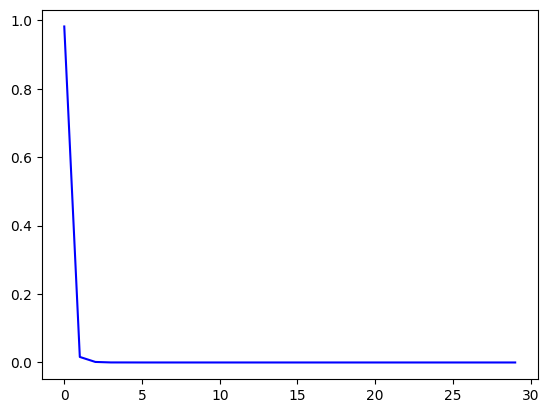

In [71]:
from matplotlib import pylab as plt
from sklearn.decomposition import PCA

pca = PCA()
pca = pca.fit(br)

print(np.cumsum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_, 'b')
plt.show
print("Answer is 1")

(d) What is the score for the first feature associated with the hundredth point in the data set when using this number of principal components? [1] // *Wat is die telling vir die eerste kenmerkvektor geassosieer met die honderdste punt in die datastel as mens hierdie aantal hoofkomponente gebruik? [1]*

In [126]:
pca = PCA(n_components=1)
new_br = pca.fit_transform(br)
new_br[99]

array([-53.10555283])

**Question 3 (3 marks).** Suppose you receive a data set containing vector representations summarizing short social media posts, where the vectors are 512-dimensional.  Each vector is associated with one of 12 topics.  Viewing these topics as class labels, assume you decide to process this data using linear discriminant analysis for dimensionality reduction. // __*Vraag 3 (3 punte).*__ *Veronderstel u ontvang 'n datastel wat vektorvoorstellings wat sosiale media plasings opsom, waar die vektore 512-dimensioneel is.  Elke vektor word geassosieer met een van 12 onderwerpe. Veronderstel u besluit om die data met lineêre diskriminant analise vir dimensionaliteitsvermindering te voorverwerk, waar u hierdie onderwerpe as klasetikette beskou.*

(a) How many rows will the within-class scatter matrix you need to compute in this process have? [1] // *Hoeveel rye sal die binne-klas verspreidingsmatriks wat u hiervoor moet bereken hê? [1]*

(b) What is the maximum rank of the between-class scatter matrix you need to compute in this process? [1] // *Wat is die maksimum rang van die tussen-klas verspreidingsmatriks wat u hiervoor moet bereken? [1]*

(c) What is the maximum number of ("non-empty") dimensions your transformed data may have when you have completed this pre-processing? [1] // *Wat is die maksimum aantal ("nie-leë") dimensies wat u getransformeerde data mag hê wanneer u hierdie voorverwerking voltooi het? [1]*


**Question 4 (2 marks).** Consider applying linear discriminant analysis to the (full) Fisher Iris data set, loaded below, __without initially centering or scaling the data__.

(a) Give the bottom-right entry of the total within-class scatter matrix. (Use the normalized form as in Formula (3.10) in the course notes.) [1]

(b) Give the proportion of within-class variance explained by the fourth principal component used in the whitening transform. [1]

__*Vraag 4 (2 punte)*__ *Beskou die toepassing van lineêre diskriminant analise op die (volle) Fisher Iris data stel, wat hieronder gelaai word, __sonder om vooraf die data te sentreer of skaleer__.*

*(a) Gee die inskrywing wat onder-regs voorkom in die totale binne-klas verspreidingsmatriks. (Gebruik die genormaliseerde form soos in Formule (3.10) van die kursusnotas.)* [1]

*(b) Gee die proporsie van binne-klas variansie verduidelik deur die vierde hoofkomponent wat in die verwittingstransform gebruik word.* [1]


In [110]:
from sklearn.datasets import load_wine
wine_data = load_wine()
X = wine_data.data # observations
y = wine_data.target # labels
X = X.T
y = y.T

(178, 13)


In [112]:
d, N = X.shape

mean = np.mean(X,axis=1)[:,np.newaxis]
centred_data = X - mean

classes = np.unique(y)
num_classes = len(classes)

Sw = np.zeros((d,d))

for a in classes:
    # Data points in class a
    X_a = X[:,y == a]

    # Class mean
    class_mean = np.mean(X_a, axis=1)[:,np.newaxis]

    # Within-class scatter
    #Sw += ((X_a - class_mean) @ (X_a - class_mean).T) / X_a.shape[1]
    Sw += (X_a.shape[1]/N) * ((X_a - class_mean) @ (X_a - class_mean).T) /  X_a.shape[1]

# print(Sw)
print(Sw[-1,-1])

eigen_values, eigen_vectors = np.linalg.eigh(Sw)

idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]

explained_variance_ = eigen_values
explained_variance_ratio_ = eigen_values/np.sum(eigen_values)

print(explained_variance_ratio_[3])

[[ 2.57635855e-01  8.03525851e-03 -1.30848883e-02 -9.55787536e-02
   1.76307380e-02  2.66414390e-02  2.22502761e-02 -9.59103497e-04
   1.64886387e-02  2.42304190e-01  7.68923374e-04 -4.90134191e-03
   1.20308711e+01]
 [ 8.03525851e-03  8.72588143e-01  2.10302888e-02  4.07765636e-01
  -8.74349301e-01 -1.42408297e-02 -9.25066280e-03  1.00036754e-02
   1.69131241e-02 -2.54339966e-01 -4.14223729e-02  4.57451333e-02
  -3.25013262e+01]
 [-1.30848883e-02  2.10302888e-02  6.49585266e-02  4.76000554e-01
   6.77893961e-01  1.58974841e-02  2.94659202e-02  6.90227489e-03
   2.63552690e-03  9.62912233e-03  2.28310228e-03  1.07275463e-02
  -4.92538724e-01]
 [-9.55787536e-02  4.07765636e-01  4.76000554e-01  7.87186493e+00
   3.18326482e+00  1.06784659e-01  2.42265906e-01  4.61242285e-02
   9.11623462e-02 -1.00079452e-01 -9.66517869e-03  2.21829008e-01
  -3.22795044e+01]
 [ 1.76307380e-02 -8.74349301e-01  6.77893961e-01  3.18326482e+00
   1.77612979e+02  5.67411819e-01  6.55605110e-01 -2.82220881e-01
